# Neural Network (nn)

[Edward Lu](https://github.com/edwardlu71/notebooks)

### simple explanation of the concept of neural network

#### Supervised Learning
the machine learning task of learning a function that maps an input to a desired output based on example input-output pairs.

 - no hidden layer
 - no torch or tensorflow
 - with known backward propagation function

## Solve the problem with machine learning method

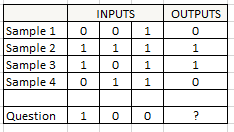

In [1]:
import numpy as np

### sigmoid function and its derivative

$$  \begin{align} f(x) & = \frac{1}{1+e^{-x}} \tag{1} \\
    f'(x) & = \frac{e^{-x}}{(1+e^{-x})^2} = f*(1-f) \end{align} \tag{2} $$

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(y):
    return y * (1 - y)

### training inputs

In [8]:
training_inputs = np.array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
print(f"training_inputs = {training_inputs.shape}")
training_inputs

training_inputs = (4, 3)


array([[0, 0, 1],
       [1, 1, 1],
       [1, 0, 1],
       [0, 1, 1]])

### training outputs

In [9]:
training_outputs = np.array([[0, 1, 1, 0]]).T
print(f"training_outputs = {training_outputs.shape}")
training_outputs

training_outputs = (4, 1)


array([[0],
       [1],
       [1],
       [0]])

### initial random weights

In [10]:
np.random.seed(71)
weights = 2 * np.random.random((3, 1)) - 1  # random numbers between -1 and 1
print(f"weights = {weights.shape}")
weights

weights = (3, 1)


array([[-0.62884945],
       [-0.22680139],
       [ 0.6637924 ]])

### training loop of epoches

In [11]:
epoch_num = 100000
for iteration in range(epoch_num):
    # input
    input_layer = training_inputs

    # forward
    outputs = sigmoid(np.dot(input_layer, weights))

    # loss = y_hat - y
    errors = training_outputs - outputs

    # backward propagation :
    #     adjustment delta = error * derivative of normalised outputs (formally dLoss/dWeight)
    adjustments = errors * sigmoid_derivative(outputs)
    weights += np.dot(input_layer.T, adjustments)

In [12]:
outputs = sigmoid(np.dot(training_inputs, weights))
outputs

array([[0.00301781],
       [0.99753709],
       [0.99799168],
       [0.00246105]])

In [13]:
# if input is [1, 0, 0], what's the output?

answer = sigmoid(np.dot(np.array([1, 0, 0]), weights))
print(f"output for input [1, 0, 0] is {answer}")

output for input [1, 0, 0] is [0.99999391]


## formal format

In [12]:
#!/usr/bin/env python

# a very simple explanation of the concept of neural network
# - no hidden layer
# - no torch

import numpy as np


class NeuralNetwork():
    def __init__(self):
        np.random.seed(71)
        self.weights = 2 * np.random.random((3, 1)) - 1  # random numbers between -1 and 1
        print(f"weights = {self.weights.shape}")
        [print(row) for row in self.weights]

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def train(self, training_inputs, training_outputs, training_iterations):
        for iteration in range(training_iterations):
            # forward
            outputs = self.think(training_inputs)

            # loss = y_hat - y
            errors = training_outputs - outputs

            # backward propagation :
            #     adjustment delta = error * derivative of normalised outputs (formally dLoss/dWeight)
            adjustments = np.dot(training_inputs.T, errors * self.sigmoid_derivative(outputs))
            self.weights += adjustments

    def think(self, inputs):
        inputs = inputs.astype(float)
        outputs = self.sigmoid(np.dot(inputs, self.weights))
        return outputs


def main():
    neural_network = NeuralNetwork()

    training_inputs = np.array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
    print(f"training_inputs = {training_inputs.shape}")
    [print(row) for row in training_inputs]

    training_outputs = np.array([[0, 1, 1, 0]]).T
    print(f"training_outputs = {training_outputs.shape}")
    [print(row) for row in training_outputs]

    neural_network.train(training_inputs, training_outputs, 1000000)

    print(f"weights after training = ")
    [print(row) for row in neural_network.weights]

    # if input is [1, 0, 0], what's the output?
    answer = neural_network.sigmoid(np.dot(np.array([1, 0, 0]), neural_network.weights))
    print(f"output for input [1, 0, 0] is {answer}")

if __name__ == "__main__":
    main()



weights = (3, 1)
[-0.62884945]
[-0.22680139]
[0.6637924]
training_inputs = (4, 3)
[0 0 1]
[1 1 1]
[1 0 1]
[0 1 1]
training_outputs = (4, 1)
[0]
[1]
[1]
[0]
weights after training = 
[14.32159732]
[-0.20327748]
[-6.95763613]
output for input [1, 0, 0] is [0.9999994]
